In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None  # default='warn'


In [127]:
df = pd.read_csv('workload.csv')

### Summary

In [128]:
df.head()

,Full Name,Date,Time,Variable,Value
0,Alan McDonald,2020-01-02,08:00,Wellness,29.06
1,Alan McDonald,2020-01-02,09:00,Training Load,88.00
2,Alan McDonald,2020-01-02,16:00,Training Load,185.00
3,Alan McDonald,2020-01-03,09:00,Training Load,179.00
4,Alan McDonald,2020-01-03,16:00,Training Load,224.00


# Q1

In [129]:
## Filter
q1 =  df[df['Variable'] == 'Training Load']

## Date
q1['Date'] = pd.to_datetime(df['Date'])

## Sum
grouped =  q1.groupby(['Full Name','Date'])['Value'].sum().reset_index(name='daily_workload').sort_values(['Date'], ascending=True)
grouped[grouped['Full Name']=='Alan McDonald']


,Full Name,Date,daily_workload
0,Alan McDonald,2020-01-02,273.0
1,Alan McDonald,2020-01-03,403.0
2,Alan McDonald,2020-01-04,31.0
3,Alan McDonald,2020-01-05,269.0
4,Alan McDonald,2020-01-06,243.0
...,...,...,...
309,Alan McDonald,2020-12-25,397.0
310,Alan McDonald,2020-12-26,51.0
311,Alan McDonald,2020-12-27,202.0
312,Alan McDonald,2020-12-28,299.0


# Q2

In [158]:
## Sum
grouped =  q1.groupby(['Date','Full Name'])['Value'].sum().reset_index(name='daily_workload').sort_values(['Date'], ascending=True)
vector = grouped.values
vector

array([[Timestamp('2020-01-02 00:00:00'), 'Alan McDonald', 273.0],
       [Timestamp('2020-01-02 00:00:00'), 'Ann Whitaker', 440.0],
       [Timestamp('2020-01-02 00:00:00'), 'Eve Black', 460.0],
       ...,
       [Timestamp('2020-12-29 00:00:00'), 'Mike Smith', 46.0],
       [Timestamp('2020-12-29 00:00:00'), 'Peter Jackson', 91.0],
       [Timestamp('2020-12-29 00:00:00'), 'Susan Kane', 24.0]],
      dtype=object)

# Q3

In [131]:
def my_RA_mean(vec,divider):
    new_vec = []
    i = 0
    while((i + divider-1)<len(vec)):
        last = (i + divider)
        new_vec.append(np.sum(vec[i:last])/divider)
        i = i+1
    return new_vec

print(my_RA_mean([3,4,5,6,7],2))
print(my_RA_mean([3,4,5,6,7],3))

[3.5, 4.5, 5.5, 6.5]
[4.0, 5.0, 6.0]


In [156]:
def my_RA_sd(vec,divider):
    new_vec = []
    i = 0
    while((i + divider-1)<len(vec)):
        last = (i + divider)
        st = np.std(vec[i:last],  ddof=1)
        new_vec.append(st)
        i = i + 1
    return new_vec
print(my_RA_sd([3,4,5,6,7],2))
print(my_RA_sd([3,4,5,6,7],3))


[0.7071067811865476, 0.7071067811865476, 0.7071067811865476, 0.7071067811865476]
[1.0, 1.0, 1.0]


# Q4

In [161]:
# Create new column
grouped['acute.mean'] = None
grouped['acute.sd'] = None
grouped['acute.cv'] = None
grouped['chronic.mean'] = None
grouped['chronic.sd'] = None
grouped['chronic.cv'] = None
grouped['AC.ratio'] = None

i = 0
lags7 = 7
lags14 = 14
index = i + lags7

filtered = grouped[grouped['Full Name']=='Alan McDonald']
filtered = filtered.reset_index(drop=True)
while(i < (len(filtered))):
    index = i + lags7
    index14 = i + lags14
    if index < len(filtered):
        mean = my_RA_mean(filtered.iloc[i:index,2],lags7)[0]
        std = my_RA_sd(filtered.iloc[i:index,2],lags7)[0]

        filtered['acute.mean'].iloc[index-1]= mean
        filtered['acute.sd'].iloc[index-1] = std
        filtered['acute.cv'].iloc[index-1] = std/mean
        if (index*2-1) < len(filtered):
            chronic_mean = filtered['chronic.mean'].iloc[index-1]
            if chronic_mean:
                filtered['AC.ratio'].iloc[index-1] = mean/chronic_mean


    if index14 < len(filtered): 
        mean = my_RA_mean(filtered.iloc[i:index14,2],lags14)[0]
        std = my_RA_sd(filtered.iloc[i:index14,2],lags14)[0]
        
        filtered['chronic.mean'].iloc[index14-1]= mean
        filtered['chronic.sd'].iloc[index14-1] = std
        filtered['chronic.cv'].iloc[index14-1] = std / mean


    i = i + 1


filtered.head(16)
#filtered['chronic.mean'].iloc[7*2-1]


,Date,Full Name,daily_workload,acute.mean,acute.sd,acute.cv,chronic.mean,chronic.sd,chronic.cv,AC.ratio
0,2020-01-02,Alan McDonald,273.0,None,None,None,None,None,None,None
1,2020-01-03,Alan McDonald,403.0,None,None,None,None,None,None,None
2,2020-01-04,Alan McDonald,31.0,None,None,None,None,None,None,None
3,2020-01-05,Alan McDonald,269.0,None,None,None,None,None,None,None
4,2020-01-06,Alan McDonald,243.0,None,None,None,None,None,None,None
5,2020-01-07,Alan McDonald,0.0,None,None,None,None,None,None,None
6,2020-01-08,Alan McDonald,0.0,174.142857,161.776006,0.928984,None,None,None,None
7,2020-01-09,Alan McDonald,244.0,170.0,159.172862,0.936311,None,None,None,None
8,2020-01-10,Alan McDonald,427.0,173.428571,165.173502,0.952401,None,None,None,None
9,2020-01-11,Alan McDonald,19.0,171.714286,166.950805,0.972259,None,None,None,None


# Q5

In [162]:
# Create new column
grouped['acute.mean'] = None
grouped['acute.sd'] = None
grouped['acute.cv'] = None
grouped['chronic.mean'] = None
grouped['chronic.sd'] = None
grouped['chronic.cv'] = None
grouped['AC.ratio'] = None

i = 0
lags7 = 7
lags14 = 14
index = i + lags7

# filtered = grouped[grouped['Full Name']=='Alan McDonald']
filtered = grouped
filtered = filtered.reset_index(drop=True)
while(i < (len(filtered))):
    index = i + lags7
    index14 = i + lags14
    if index < len(filtered):
        mean = my_RA_mean(filtered.iloc[i:index,2],lags7)[0]
        std = my_RA_sd(filtered.iloc[i:index,2],lags7)[0]

        filtered['acute.mean'].iloc[index-1]= mean
        filtered['acute.sd'].iloc[index-1] = std
        filtered['acute.cv'].iloc[index-1] = std/mean
        if (index*2-1) < len(filtered):
            chronic_mean = filtered['chronic.mean'].iloc[index-1]
            if chronic_mean:
                filtered['AC.ratio'].iloc[index-1] = mean/chronic_mean


    if index14 < len(filtered): 
        mean = my_RA_mean(filtered.iloc[i:index14,2],lags14)[0]
        std = my_RA_sd(filtered.iloc[i:index14,2],lags14)[0]
        
        filtered['chronic.mean'].iloc[index14-1]= mean
        filtered['chronic.sd'].iloc[index14-1] = std
        filtered['chronic.cv'].iloc[index14-1] = std / mean


    i = i + 1




,Date,Full Name,daily_workload,acute.mean,acute.sd,acute.cv,chronic.mean,chronic.sd,chronic.cv,AC.ratio
0,2020-01-02,Alan McDonald,273.0,None,None,None,None,None,None,None
1,2020-01-02,Ann Whitaker,440.0,None,None,None,None,None,None,None
2,2020-01-02,Eve Black,460.0,None,None,None,None,None,None,None
3,2020-01-02,Frank West,188.0,None,None,None,None,None,None,None
4,2020-01-02,John Doe,308.0,None,None,None,None,None,None,None
5,2020-01-02,Michael Peterson,85.0,None,None,None,None,None,None,None
6,2020-01-02,Mike Smith,555.0,329.857143,165.099393,0.500518,None,None,None,None
7,2020-01-02,Peter Jackson,633.0,381.285714,197.355613,0.517606,None,None,None,None
8,2020-01-02,Stuart Rogan,175.0,343.428571,209.272436,0.609362,None,None,None,None
9,2020-01-02,Susan Kane,42.0,283.714286,229.157671,0.807706,None,None,None,None


# Q6

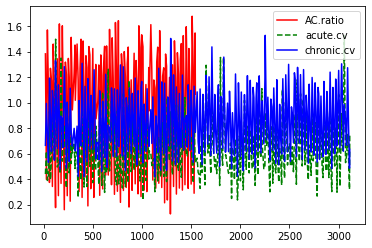

In [176]:
fig, ax = plt.subplots()
keys = ['AC.ratio', 'acute.cv', 'chronic.cv']
athlete_list = ['Alan McDonald', 'Ann Whitaker', 'Eve Black', 'Frank West', 'John Doe', 'Michael Peterson', 'Peter Jackson', 'Stuart Rogan', 'Susan Kane']
#for athlete in athlete_list:
#    for key in keys:
#        ptl.plot()

athlete = filtered[filtered['Full Name'] == 'Alan McDonald']
 
# multiple line plots
plt.plot(athlete['AC.ratio'], label='AC.ratio', color='red')
plt.plot(athlete['acute.cv'], label='acute.cv', color='green', linestyle='dashed')
plt.plot(athlete['chronic.cv'], label='chronic.cv', color='blue')

# show legend
plt.legend()

# show graph
plt.show()